In [1]:
import numpy as np
import scipy
from qutip import *
from numba import jit, njit

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import plot
import plotly.graph_objs as go

In [16]:
#ns = np.linspace(10e-4, 1, 100) #we define the saturation number parameter
#r_v = np.linspace(10e-4, 1, 100)

OmR = np.logspace(start=-2, stop=4, num=100)  # ns ranges from 10^-2 to 10^2 with 100 points
r_v = np.logspace(start=-4, stop=0, num=100) 

ns = .5/OmR**2

C = .5*r_v/ns #we define the cooperativity parameter



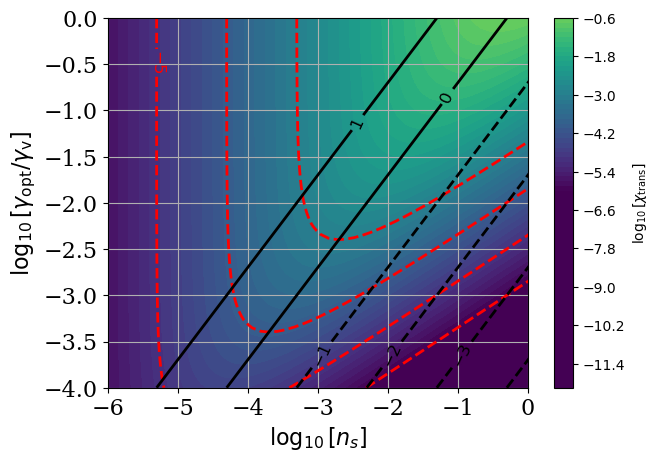

In [155]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

# Create a meshgrid for the ns and r_v values
NS, RV = np.meshgrid(ns, r_v, indexing='ij')

chi_ph = 2*NS/(2*NS+RV)**2.  *RV**2

C = .5*RV/NS

#NS, RV = np.meshgrid(ns, C, indexing='ij')
#chi_ph = 2*NS/(2*NS+2*NS*RV)**2.

# Create the plot
plt.figure(figsize=(8, 6))

# Colormap plot
vmin = -6
vmax = 1
contourf = plt.contourf(np.log10(NS), np.log10(RV), np.log10(chi_ph), levels=100, cmap='viridis', vmin=vmin, vmax=vmax)

# Add isolines
contour2 = plt.contour(np.log10(NS), np.log10(RV), np.log10(chi_ph), colors='red', levels=np.arange(-6, -2, 1.), linewidths=2.)

contour = plt.contour(np.log10(NS), np.log10(RV), np.log10(C), colors='black', levels=np.arange(np.log10(8)*0-4, 2, 1), linewidths=2.)



# Add labels to the isolines
plt.clabel(contour2, inline=True, fontsize=12)

plt.clabel(contour, inline=True, fontsize=12)


# Add colorbar
plt.colorbar(contourf, label=r'$\log_{10}[\chi_{\rm trans}]$')

# Add axis labels
plt.xlabel(r'$\log_{10}[n_s]$', fontdict=font)
plt.ylabel(r'$\log_{10}[\gamma_{\rm opt}/\gamma_{\rm v}]$', fontdict=font)

# Add grid and display the plot

plt.xticks(fontsize=font['size'], fontname=font['family'], weight=font['weight'], color=font['color'])
plt.yticks(fontsize=font['size'], fontname=font['family'], weight=font['weight'], color=font['color'])

plt.xlim((-6,0))
plt.ylim((-4,0))

plt.grid()
plt.gcf().set_size_inches(170 / 25.4, 120 / 25.4)
plt.tight_layout()
#plt.savefig('bistab_chi_map.png', dpi=300)

#plt.show()

In [ ]:
#ns = np.linspace(10e-4, 1, 100) #we define the saturation number parameter
#r_v = np.linspace(10e-4, 1, 100)

OmR = np.logspace(start=-2, stop=4, num=200)  # ns ranges from 10^-2 to 10^2 with 100 points
r_v = np.logspace(start=-4, stop=0, num=200) 

ns = .5/OmR**2

C = .5*r_v/ns #we define the cooperativity parameter

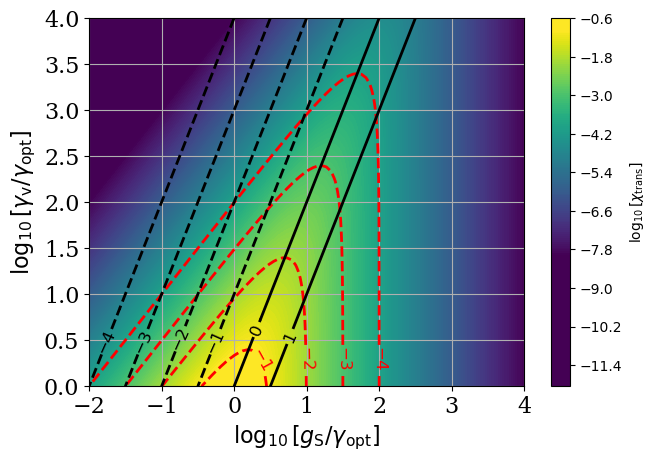

In [22]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

# Create a meshgrid for the ns and r_v values
OMR, RV = np.meshgrid(OmR, r_v, indexing='ij')

NS, RV = np.meshgrid(ns, r_v, indexing='ij')

chi_ph = 2*NS/(2*NS+RV)**2.  *RV**2

C = .5*RV/NS

#NS, RV = np.meshgrid(ns, C, indexing='ij')
#chi_ph = 2*NS/(2*NS+2*NS*RV)**2.

# Create the plot
plt.figure(figsize=(8, 6))

# Colormap plot
vmin = -8
vmax = -1
contourf = plt.contourf(np.log10(OMR), -np.log10(RV), np.log10(chi_ph), levels=200, cmap='viridis', vmin=vmin, vmax=vmax)

# Add isolines
contour2 = plt.contour(np.log10(OMR), -np.log10(RV), np.log10(chi_ph), colors='red', levels=np.arange(-4, -0, 1.), linewidths=2.)

contour = plt.contour(np.log10(OMR), -np.log10(RV), np.log10(C), colors='black', levels=np.arange(np.log10(8)*0-4, 2, 1), linewidths=2.)



# Add labels to the isolines
#plt.clabel(contour2, inline=True, fontsize=12)
plt.clabel(contour2, inline=True, fontsize=12, manual=[(.4, .3), (1., .3), (1.5, .3), (2,.3)])  # Example positions for labels

plt.clabel(contour, inline=True, fontsize=12, manual=[ (.75,.55),(.1, .7), (-.3, .5), (-.7, .5), (-1.3, .5), (-1.8, .5)])  # Example positions for labels
#plt.clabel(contour, inline=True, fontsize=12)


# Add colorbar
plt.colorbar(contourf, label=r'$\log_{10}[\chi_{\rm trans}]$')

# Add axis labels
plt.xlabel(r'$\log_{10}[g_{\rm S}/\gamma_{\rm opt}]$', fontdict=font)
plt.ylabel(r'$\log_{10}[\gamma_{\rm v}/\gamma_{\rm opt}]$', fontdict=font)

# Add grid and display the plot

plt.xticks(fontsize=font['size'], fontname=font['family'], weight=font['weight'], color=font['color'])
plt.yticks(fontsize=font['size'], fontname=font['family'], weight=font['weight'], color=font['color'])

plt.xlim((-2,4))
plt.ylim((0,4))

plt.grid()
plt.gcf().set_size_inches(170 / 25.4, 120 / 25.4)
plt.tight_layout()
#plt.savefig('bistab_chi_map_funzOmGam.png', dpi=300)

#plt.show()

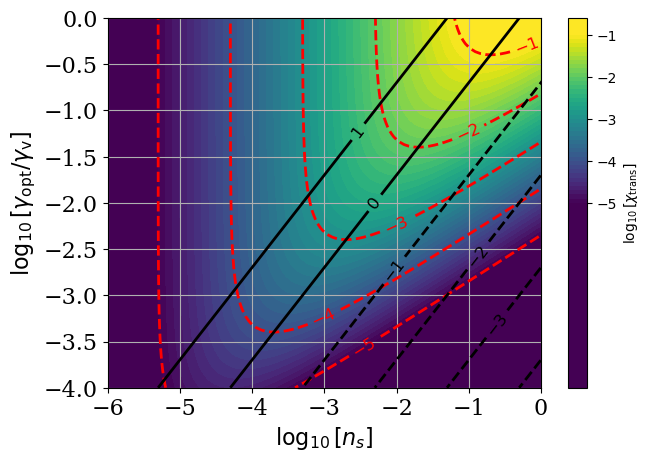

In [136]:
# Adjust colormap range
vmin = -5
vmax = -1
contourf = plt.contourf(np.log10(NS), np.log10(RV), np.log10(chi_ph), levels=100, cmap='viridis', vmin=vmin, vmax=vmax)

# Add red isolines and position labels diagonally
contour2 = plt.contour(np.log10(NS), np.log10(RV), np.log10(chi_ph), colors='red', levels=np.arange(-5, -0, 1.), linewidths=2.)
plt.clabel(contour2, inline=True, fontsize=12, manual=[ (-2.5, -3.5),  (-3, -3.25), (-2,-2.25), (-1,-1.25), (-.2,-.3)])  # Example positions for labels

# Add black isolines
contour = plt.contour(np.log10(NS), np.log10(RV), np.log10(C), colors='black', levels=np.arange(np.log10(8)*0-4, 2, 1), linewidths=2.)
plt.clabel(contour, inline=True, fontsize=12, manual=[ (-2.5, -1.25),(-2.3,-2), (-2, -2.75), (-1,-2.5), (-.8,-3.2)])
#plt.clabel(contour, inline=True, fontsize=12)

# Add axis labels
plt.xlabel(r'$\log_{10}[n_s]$', fontdict=font)
plt.ylabel(r'$\log_{10}[\gamma_{\rm opt}/\gamma_{\rm v}]$', fontdict=font)

# Add colorbar
plt.colorbar(contourf, label=r'$\log_{10}[\chi_{\rm trans}]$', ticks=np.arange(vmin, vmax + 0.1, 1))

# Add grid and display the plot
plt.xticks(fontsize=font['size'], fontname=font['family'], weight=font['weight'], color=font['color'])
plt.yticks(fontsize=font['size'], fontname=font['family'], weight=font['weight'], color=font['color'])

plt.xlim((-6, 0))
plt.ylim((-4, 0))
plt.grid()
plt.gcf().set_size_inches(170 / 25.4, 120 / 25.4)
plt.tight_layout()
plt.show()

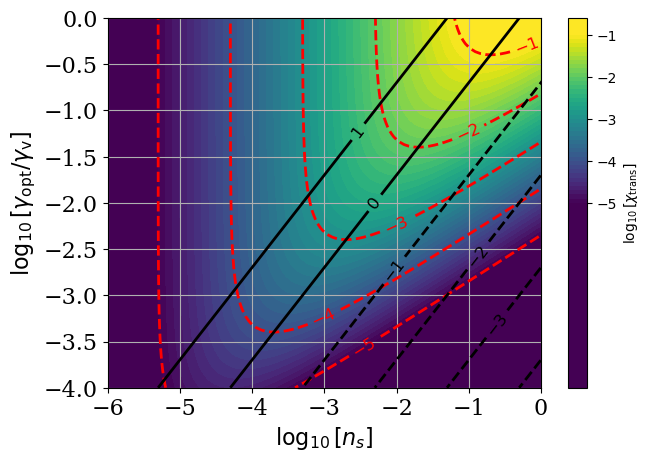

In [146]:
# Adjust colormap range
vmin = -5
vmax = -1
#levels = np.linspace(vmin, vmax, 100)

contourf = plt.contourf(np.log10(NS), np.log10(RV), np.log10(chi_ph), levels=100, cmap='viridis', vmin=vmin, vmax=vmax)

# Add red isolines and position labels diagonally
contour2 = plt.contour(np.log10(NS), np.log10(RV), np.log10(chi_ph), colors='red', levels=np.arange(-5, 0, 1.), linewidths=2.)
plt.clabel(contour2, inline=True, fontsize=12, manual=[(-2.5, -3.5), (-3, -3.25), (-2, -2.25), (-1, -1.25), (-0.2, -0.3)])  # Example positions for labels

# Add black isolines
contour = plt.contour(np.log10(NS), np.log10(RV), np.log10(C), colors='black', levels=np.arange(np.log10(8)*0-4, 2, 1), linewidths=2.)
plt.clabel(contour, inline=True, fontsize=12, manual=[(-2.5, -1.25), (-2.3, -2), (-2, -2.75), (-1, -2.5), (-0.8, -3.2)])

# Add axis labels
plt.xlabel(r'$\log_{10}[n_s]$', fontdict=font)
plt.ylabel(r'$\log_{10}[\gamma_{\rm opt}/\gamma_{\rm v}]$', fontdict=font)

# Add colorbar with correct ticks
cbar = plt.colorbar(contourf, label=r'$\log_{10}[\chi_{\rm trans}]$', ticks=np.linspace(vmin, vmax, num=(vmax-vmin+1)))

# Add grid and display the plot
plt.xticks(fontsize=font['size'], fontname=font['family'], weight=font['weight'], color=font['color'])
plt.yticks(fontsize=font['size'], fontname=font['family'], weight=font['weight'], color=font['color'])

plt.xlim((-6, 0))
plt.ylim((-4, 0))
plt.grid()
plt.gcf().set_size_inches(170 / 25.4, 120 / 25.4)
plt.tight_layout()
plt.show()